## Pandas实现groupby分组统计

groupby：先对数据分组，然后在魅族上应用聚合函数、转化函数

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','foo'],
                 'B':['one','one','two','three','two','two','one','three'],
                 'C':np.random.randn(8),
                 'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.313493,-0.588022
1,bar,one,-0.279727,-0.717828
2,foo,two,-0.905812,-1.248411
3,bar,three,-0.247845,-1.793732
4,foo,two,0.416009,-0.379853
5,bar,two,0.041836,1.210698
6,foo,one,1.104818,-0.070256
7,foo,three,0.646603,-0.797933


In [3]:
# 单列groupby，查询所有数据的统计
df.groupby('A').sum()

,C,D
A,,
bar,-0.485737,-1.300862
foo,1.575110,-3.084474


In [4]:
# 多列groupby
df.groupby(['A','B']).sum()   # 二级行索引

C         D
A   B                        
bar one   -0.279727 -0.717828
    three -0.247845 -1.793732
    two    0.041836  1.210698
foo one    1.418311 -0.658277
    three  0.646603 -0.797933
    two   -0.489804 -1.628264

In [6]:
df.groupby(['A','B'],as_index=False).sum()

,A,B,C,D
0,bar,one,-0.279727,-0.717828
1,bar,three,-0.247845,-1.793732
2,bar,two,0.041836,1.210698
3,foo,one,1.418311,-0.658277
4,foo,three,0.646603,-0.797933
5,foo,two,-0.489804,-1.628264


In [7]:
# 同时查看多种数据统计信息
df.groupby('A').agg([np.sum,np.mean,np.std])   # 两级列索引

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar -0.485737 -0.161912  0.177169 -1.300862 -0.433621  1.522245
foo  1.575110  0.315022  0.747389 -3.084474 -0.616895  0.443685

In [8]:
# 查看单列的结果数据统计
df.groupby('A')['C'].agg([np.sum,np.mean,np.std])   # 相当于df.groupby('A').agg([np.sum,np.mean,np.std])['A']

,sum,mean,std
A,,,
bar,-0.485737,-0.161912,0.177169
foo,1.575110,0.315022,0.747389


In [9]:
# 不同列使用不同聚合函数
df.groupby('A').agg({'C':np.sum,'D':np.mean})  # 参数是字典

,C,D
A,,
bar,-0.485737,-0.433621
foo,1.575110,-0.616895


In [11]:
# 理解groupby的过程
g = df.groupby('A')
# 使用for循环遍历DataFrameGroupBy
for name,group in g:
    print(name)
    print(group)
    print()

bar
     A      B         C         D
1  bar    one -0.279727 -0.717828
3  bar  three -0.247845 -1.793732
5  bar    two  0.041836  1.210698

foo
     A      B         C         D
0  foo    one  0.313493 -0.588022
2  foo    two -0.905812 -1.248411
4  foo    two  0.416009 -0.379853
6  foo    one  1.104818 -0.070256
7  foo  three  0.646603 -0.797933



In [12]:
# 获取单个分组的数据
g.get_group('bar')

,A,B,C,D
1,bar,one,-0.279727,-0.717828
3,bar,three,-0.247845,-1.793732
5,bar,two,0.041836,1.210698


In [13]:
# 遍历多个列聚合的分组
g = df.groupby(['A','B'])
for name,group in g:
    print(name)   # name 的类型是tuple
    print(group)
    print()

('bar', 'one')
     A    B         C         D
1  bar  one -0.279727 -0.717828

('bar', 'three')
     A      B         C         D
3  bar  three -0.247845 -1.793732

('bar', 'two')
     A    B         C         D
5  bar  two  0.041836  1.210698

('foo', 'one')
     A    B         C         D
0  foo  one  0.313493 -0.588022
6  foo  one  1.104818 -0.070256

('foo', 'three')
     A      B         C         D
7  foo  three  0.646603 -0.797933

('foo', 'two')
     A    B         C         D
2  foo  two -0.905812 -1.248411
4  foo  two  0.416009 -0.379853



In [15]:
g.get_group(('foo','two'))

,A,B,C,D
2,foo,two,-0.905812,-1.248411
4,foo,two,0.416009,-0.379853


In [16]:
g['C']   # SeriesGroupBy

In [17]:
for name ,group in g['C']:
    print(name)
    print(group)
    print()

('bar', 'one')
1   -0.279727
Name: C, dtype: float64

('bar', 'three')
3   -0.247845
Name: C, dtype: float64

('bar', 'two')
5    0.041836
Name: C, dtype: float64

('foo', 'one')
0    0.313493
6    1.104818
Name: C, dtype: float64

('foo', 'three')
7    0.646603
Name: C, dtype: float64

('foo', 'two')
2   -0.905812
4    0.416009
Name: C, dtype: float64



In [18]:
for name,group in g['C']:
    print(name)
    print(group)
    print()

('bar', 'one')
1   -0.279727
Name: C, dtype: float64

('bar', 'three')
3   -0.247845
Name: C, dtype: float64

('bar', 'two')
5    0.041836
Name: C, dtype: float64

('foo', 'one')
0    0.313493
6    1.104818
Name: C, dtype: float64

('foo', 'three')
7    0.646603
Name: C, dtype: float64

('foo', 'two')
2   -0.905812
4    0.416009
Name: C, dtype: float64



In [19]:
data = pd.read_csv(r'C:\Users\86158\scikit_learn\pollution.csv')
data.head(5)

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [20]:
data.dtypes

date          object
pollution    float64
dew            int64
temp         float64
press        float64
wnd_dir       object
wnd_spd      float64
snow           int64
rain           int64
dtype: object

In [23]:
# 新增一列date
data['month'] = data['date'].str[:7]
data.head(5)

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain,month
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01


In [25]:
# 查看每个月的最高pollution
df = data.groupby('month')['pollution'].max()   # Series
df.head()

month
2010-01    485.0
2010-02    980.0
2010-03    784.0
2010-04    389.0
2010-05    314.0
Name: pollution, dtype: float64

<AxesSubplot:xlabel='month'>

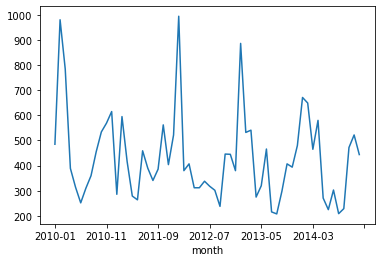

In [26]:
df.plot()

In [30]:
df = data.groupby('month').agg({'pollution':np.mean,'temp':np.min,'dew':max})
df.head()

,pollution,temp,dew
month,,,
2010-01,82.026389,-19.0,-2
2010-02,97.089286,-15.0,3
2010-03,89.673387,-9.0,8
2010-04,79.806944,-1.0,9
2010-05,86.081989,8.0,18


<AxesSubplot:xlabel='month'>

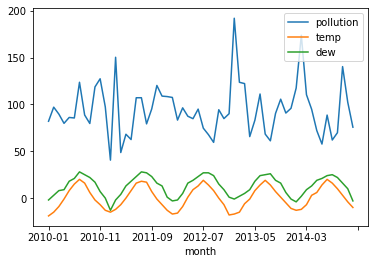

In [31]:
df.plot()